In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df=pd.read_csv("bank.csv",sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
cat_col=bank_df.select_dtypes(include="object").columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [4]:
num_col=bank_df.select_dtypes(exclude="object").columns
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

======**standardization & normalization**=======

In [6]:
age=bank_df[["age"]]
age

,age
0,30
1,33
2,35
3,30
4,59
...,...
4516,33
4517,57
4518,57
4519,28


In [7]:
#mean
mean_age=bank_df["age"].mean()
mean_age

41.17009511170095

In [8]:
#std
std_age=bank_df["age"].std()
std_age

10.576210958711275

In [9]:
#standardization
standardization=(age-mean_age)/std_age
standardization

,age
0,-1.056153
1,-0.772497
2,-0.583394
3,-1.056153
4,1.685850
...,...
4516,-0.772497
4517,1.496746
4518,1.496746
4519,-1.245256


In [10]:
# standardization using Standardscaler method

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_standardization=bank_df["ss_satandardization"]=ss.fit_transform(bank_df[["age"]])
ss_standardization

array([[-1.05626965],
       [-0.77258281],
       [-0.58345826],
       ...,
       [ 1.49691189],
       [-1.24539421],
       [ 0.26760226]])

In [11]:
age_=bank_df["age"]
age_

0       30
1       33
2       35
3       30
4       59
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64

In [12]:
#normalization
normalization=(age_-min(age_))/(max(age_)-min(age_))
normalization

0       0.161765
1       0.205882
2       0.235294
3       0.161765
4       0.588235
          ...   
4516    0.205882
4517    0.558824
4518    0.558824
4519    0.132353
4520    0.367647
Name: age, Length: 4521, dtype: float64

In [13]:
# normalization using minmaxscaler method

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_normalization=bank_df["mm_normalization"]=mm.fit_transform(bank_df[["age"]])
mm_normalization

array([[0.16176471],
       [0.20588235],
       [0.23529412],
       ...,
       [0.55882353],
       [0.13235294],
       [0.36764706]])

In [14]:
df=bank_df[["age","ss_satandardization","mm_normalization"]]
df

,age,ss_satandardization,mm_normalization
0,30,-1.056270,0.161765
1,33,-0.772583,0.205882
2,35,-0.583458,0.235294
3,30,-1.056270,0.161765
4,59,1.686036,0.588235
...,...,...,...
4516,33,-0.772583,0.205882
4517,57,1.496912,0.558824
4518,57,1.496912,0.558824
4519,28,-1.245394,0.132353


In [15]:
#normalization
d=bank_df["age"].values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_standardization=bank_df["ss_satandardization"]=ss.fit_transform(d)
ss_standardization

array([[-1.05626965],
       [-0.77258281],
       [-0.58345826],
       ...,
       [ 1.49691189],
       [-1.24539421],
       [ 0.26760226]])

In [16]:
#standardization
d=bank_df["age"].values.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_normalization=bank_df["mm_normalization"]=mm.fit_transform(bank_df[["age"]])
mm_normalization

array([[0.16176471],
       [0.20588235],
       [0.23529412],
       ...,
       [0.55882353],
       [0.13235294],
       [0.36764706]])

====== **Transformation**======

In [18]:
#exponential transformation
exp_data=np.random.exponential(size=1000)
exp_data

array([2.18817021e-01, 8.31199322e-02, 8.15180088e-01, 1.12681067e+00,
       1.53094687e+00, 9.55655497e-01, 8.71606352e-01, 3.58169049e-01,
       1.75507885e+00, 2.60055036e+00, 2.45129327e+00, 3.42046602e+00,
       9.41715082e-01, 1.05923198e+00, 1.96970832e-01, 2.53385770e-01,
       2.69531303e+00, 2.51518346e+00, 1.92138639e+00, 5.89666675e-01,
       1.85658620e-01, 1.08828000e+00, 7.25885073e-01, 1.55465425e-01,
       3.25925332e-01, 2.75446685e+00, 3.48258704e-02, 2.05775982e+00,
       6.47291803e-01, 1.93876742e+00, 4.87203810e-01, 3.22004782e-01,
       8.02337090e-01, 1.38638608e+00, 1.78488703e-01, 1.70300663e+00,
       5.08779982e-01, 6.75501617e-01, 3.98920354e+00, 2.76574430e+00,
       3.94984086e-01, 7.06094485e-01, 2.18810483e-01, 2.68121963e-01,
       5.94463022e-01, 6.88898351e-01, 1.59595369e+00, 2.93088689e-01,
       1.00685671e+00, 8.50727114e-02, 2.74719568e-01, 9.75537402e-01,
       3.11542461e-01, 2.28896483e-01, 1.55004421e+00, 6.79201930e-02,
      

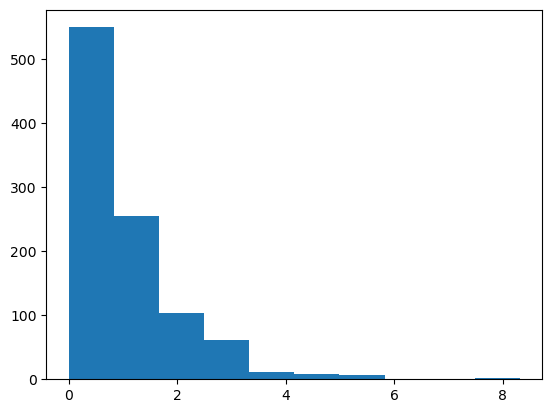

In [19]:
plt.hist(exp_data)
plt.show()

In [20]:
#normal 
nor_data=np.random.normal(size=1000)
nor_data

array([-1.36749372e+00, -1.89344841e-01,  4.87721347e-01,  1.37954294e+00,
        1.77612335e-01,  5.63386566e-01, -7.38225692e-01,  8.72404023e-01,
       -6.13914224e-01, -6.06128286e-01, -1.46256113e+00, -1.55712188e-01,
       -5.89621256e-01, -7.03224113e-01, -1.32715846e+00,  8.29410050e-02,
       -6.13972854e-01, -1.61178664e+00,  7.22842572e-01,  1.47305564e+00,
       -1.49288666e-01,  7.86843070e-01, -2.51777706e-01,  2.44592717e+00,
        1.08667351e-01,  3.12643617e-01,  9.30888806e-01, -4.43488309e-01,
        6.33518695e-04, -4.55247222e-01,  5.30240655e-01,  1.06058832e+00,
        2.32610316e+00, -4.54672931e-01,  1.67564870e-01,  1.50339380e+00,
        1.13399655e+00, -2.74026247e-01,  5.18365806e-01, -1.07930135e+00,
        6.88986940e-01,  3.81085848e-01,  5.35691809e-01,  4.51224147e-01,
        4.96292588e-01, -5.45087362e-01, -1.00801598e+00,  5.45548658e-01,
        6.88416930e-01, -2.61033984e+00, -3.54120750e-01,  1.20657902e-01,
        1.50361070e+00,  

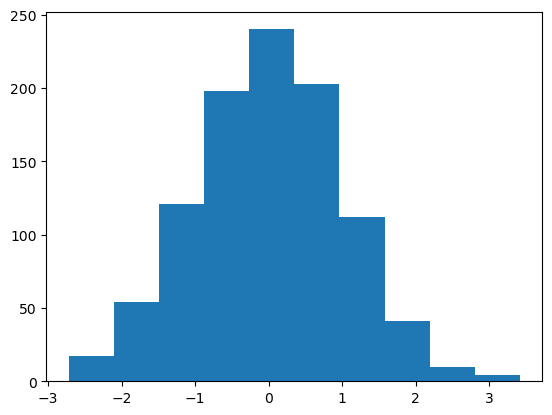

In [21]:
plt.hist(nor_data)
plt.show()

In [22]:
#log transfromation
log_tr_=np.log(exp_data)
log_tr_

array([-1.51951942e+00, -2.48747075e+00, -2.04346224e-01,  1.19391224e-01,
        4.25886413e-01, -4.53577897e-02, -1.37417389e-01, -1.02675020e+00,
        5.62513782e-01,  9.55723100e-01,  8.96615750e-01,  1.22977681e+00,
       -6.00525111e-02,  5.75441020e-02, -1.62469962e+00, -1.37284217e+00,
        9.91514351e-01,  9.22345745e-01,  6.53047003e-01, -5.28197860e-01,
       -1.68384567e+00,  8.45984648e-02, -3.20363578e-01, -1.86133192e+00,
       -1.12108697e+00,  1.01322390e+00, -3.35739476e+00,  7.21617923e-01,
       -4.34958077e-01,  6.62052419e-01, -7.19072742e-01, -1.13318888e+00,
       -2.20226448e-01,  3.26700420e-01, -1.72322997e+00,  5.32395297e-01,
       -6.75739611e-01, -3.92299728e-01,  1.38359160e+00,  1.01730979e+00,
       -9.28909804e-01, -3.48006219e-01, -1.51954930e+00, -1.31631332e+00,
       -5.20096764e-01, -3.72661551e-01,  4.67471481e-01, -1.22728002e+00,
        6.83330549e-03, -2.46424896e+00, -1.29200445e+00, -2.47667782e-02,
       -1.16621964e+00, -

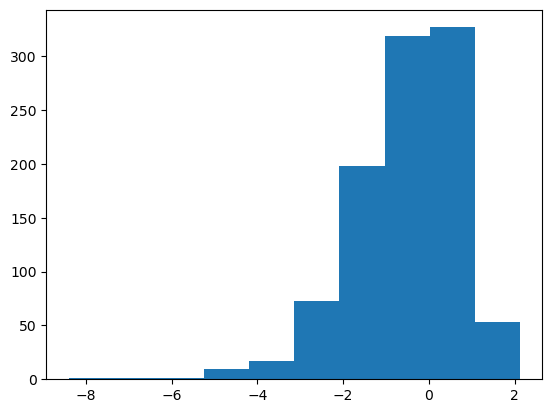

In [23]:
plt.hist(log_tr_)
plt.show()

In [24]:
#power transformation
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pow_tr_=pt.fit_transform(bank_df[["age"]])
pow_tr_

array([[-1.14068386],
       [-0.74380935],
       [-0.50225905],
       ...,
       [ 1.39859711],
       [-1.43229538],
       [ 0.41207287]])

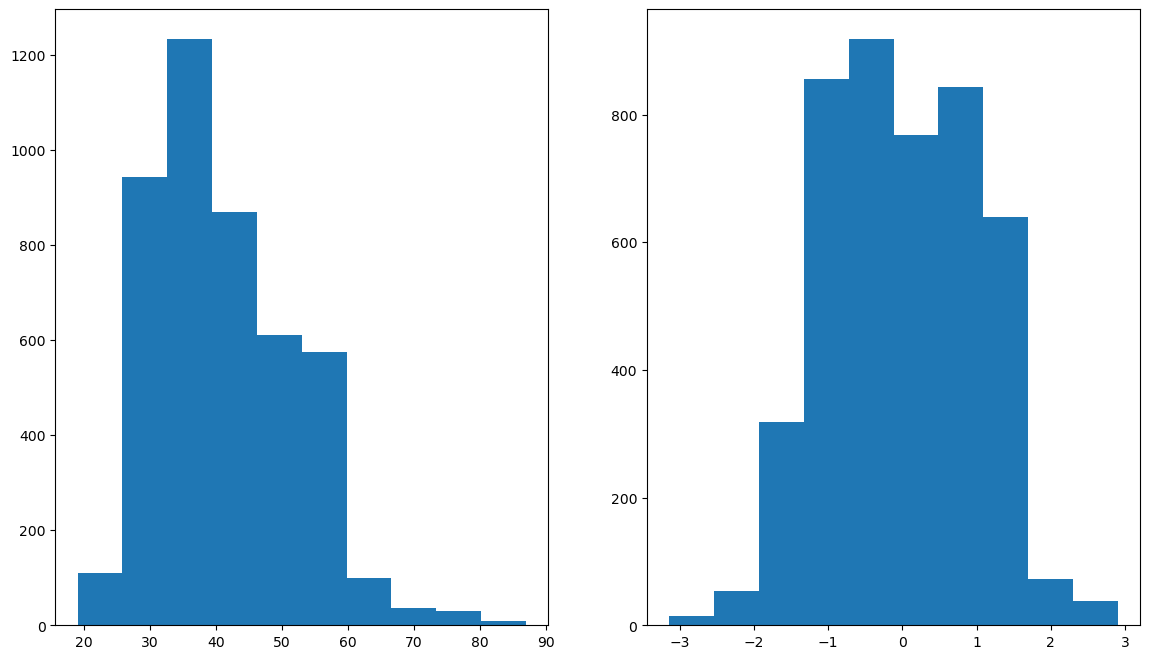

In [25]:
df=bank_df[["age"]]
plt.figure(figsize=(14,8))
plt.subplot(1,2,1).hist(df)
plt.subplot(1,2,2).hist(pow_tr_)
plt.show()